In [39]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/aiConnect_1st

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aiConnect_1st


In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 데이터로드: p_train.csv

In [41]:
p_train_path = './p_train.csv'
df = pd.read_csv(p_train_path) # train or test

In [42]:
display(df)

dates = df['date'].unique().tolist()

# datetime info
df['date'] = pd.to_datetime(df['date']) # str -> datetime
df['doy'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# datetime > str
df['date'] = df['date'].dt.date.astype(str)
display(df)

,date,hour,y
0,2013-01-02,0,97
1,2013-01-02,1,103
2,2013-01-02,2,102
3,2013-01-02,3,102
4,2013-01-02,4,61
...,...,...,...
83203,2022-06-30,19,112
83204,2022-06-30,20,115
83205,2022-06-30,21,105
83206,2022-06-30,22,78


,date,hour,y,doy,year,month,day,weekday
0,2013-01-02,0,97,2,2013,1,2,2
1,2013-01-02,1,103,2,2013,1,2,2
2,2013-01-02,2,102,2,2013,1,2,2
3,2013-01-02,3,102,2,2013,1,2,2
4,2013-01-02,4,61,2,2013,1,2,2
...,...,...,...,...,...,...,...,...
83203,2022-06-30,19,112,181,2022,6,30,3
83204,2022-06-30,20,115,181,2022,6,30,3
83205,2022-06-30,21,105,181,2022,6,30,3
83206,2022-06-30,22,78,181,2022,6,30,3


In [43]:
# hour -> daily
hour_data = []
for date in dates:
    # 2013-01-02
    data = df[df['date'] == date]['y'].tolist()
    hour_data.append(data)

print(hour_data[:5])

[[97, 103, 102, 102, 61, 59, 41, 31, 28, 22, 17, 12, 27, 44, 39, 85, 74, 37, 63, 65, 59, 69, 52, 57], [112, 105, 111, 118, 85, 81, 65, 39, 32, 28, 19, 37, 40, 52, 89, 68, 81, 57, 53, 68, 56, 75, 44, 75], [107, 108, 102, 119, 103, 95, 36, 44, 27, 39, 34, 22, 39, 55, 75, 83, 108, 57, 77, 49, 66, 66, 56, 60], [59, 85, 78, 95, 65, 68, 52, 42, 42, 36, 24, 51, 29, 27, 38, 65, 77, 75, 69, 60, 90, 94, 126, 130], [111, 113, 84, 113, 101, 76, 38, 55, 35, 34, 33, 28, 26, 60, 59, 170, 190, 175, 161, 160, 164, 163, 151, 172]]


In [44]:
hour_df = pd.DataFrame(data=hour_data,
                       columns=[f'{i}H' for i in range(24)]) # if train->24, test->15
hour_df

,0H,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,97,103,102,102,61,59,41,31,28,22,...,39,85,74,37,63,65,59,69,52,57
1,112,105,111,118,85,81,65,39,32,28,...,89,68,81,57,53,68,56,75,44,75
2,107,108,102,119,103,95,36,44,27,39,...,75,83,108,57,77,49,66,66,56,60
3,59,85,78,95,65,68,52,42,42,36,...,38,65,77,75,69,60,90,94,126,130
4,111,113,84,113,101,76,38,55,35,34,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,151,161,154,123,91,96,96,84,51,40,...,79,136,111,109,111,110,127,106,113,106
3463,122,120,120,120,81,93,92,82,80,53,...,131,124,116,158,161,111,98,121,103,107
3464,104,95,80,91,85,90,53,54,39,58,...,96,96,94,85,106,123,112,92,97,79
3465,105,143,142,164,112,79,73,66,46,30,...,64,103,120,103,85,102,88,100,52,74


In [45]:
df

,date,hour,y,doy,year,month,day,weekday
0,2013-01-02,0,97,2,2013,1,2,2
1,2013-01-02,1,103,2,2013,1,2,2
2,2013-01-02,2,102,2,2013,1,2,2
3,2013-01-02,3,102,2,2013,1,2,2
4,2013-01-02,4,61,2,2013,1,2,2
...,...,...,...,...,...,...,...,...
83203,2022-06-30,19,112,181,2022,6,30,3
83204,2022-06-30,20,115,181,2022,6,30,3
83205,2022-06-30,21,105,181,2022,6,30,3
83206,2022-06-30,22,78,181,2022,6,30,3


In [46]:
# df --- hour_df
df = df.drop_duplicates('date', keep='first').reset_index(drop=True)

In [47]:
gen_df = pd.concat([df, hour_df], axis='columns')
gen_df

,date,hour,y,doy,year,month,day,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,2013-01-02,0,97,2,2013,1,2,2,97,103,...,39,85,74,37,63,65,59,69,52,57
1,2013-01-03,0,112,3,2013,1,3,3,112,105,...,89,68,81,57,53,68,56,75,44,75
2,2013-01-04,0,107,4,2013,1,4,4,107,108,...,75,83,108,57,77,49,66,66,56,60
3,2013-01-05,0,59,5,2013,1,5,5,59,85,...,38,65,77,75,69,60,90,94,126,130
4,2013-01-06,0,111,6,2013,1,6,6,111,113,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,2022-06-26,0,151,177,2022,6,26,6,151,161,...,79,136,111,109,111,110,127,106,113,106
3463,2022-06-27,0,122,178,2022,6,27,0,122,120,...,131,124,116,158,161,111,98,121,103,107
3464,2022-06-28,0,104,179,2022,6,28,1,104,95,...,96,96,94,85,106,123,112,92,97,79
3465,2022-06-29,0,105,180,2022,6,29,2,105,143,...,64,103,120,103,85,102,88,100,52,74


In [51]:
gen_df.to_csv('./ml_pre_df.csv', index=False)

# 데이터 Train, Valid 나누기

In [52]:
# ml_pre_df 만든거 로드
df = pd.read_csv('./ml_pre_df.csv')
df

,date,hour,y,doy,year,month,day,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,2013-01-02,0,97,2,2013,1,2,2,97,103,...,39,85,74,37,63,65,59,69,52,57
1,2013-01-03,0,112,3,2013,1,3,3,112,105,...,89,68,81,57,53,68,56,75,44,75
2,2013-01-04,0,107,4,2013,1,4,4,107,108,...,75,83,108,57,77,49,66,66,56,60
3,2013-01-05,0,59,5,2013,1,5,5,59,85,...,38,65,77,75,69,60,90,94,126,130
4,2013-01-06,0,111,6,2013,1,6,6,111,113,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,2022-06-26,0,151,177,2022,6,26,6,151,161,...,79,136,111,109,111,110,127,106,113,106
3463,2022-06-27,0,122,178,2022,6,27,0,122,120,...,131,124,116,158,161,111,98,121,103,107
3464,2022-06-28,0,104,179,2022,6,28,1,104,95,...,96,96,94,85,106,123,112,92,97,79
3465,2022-06-29,0,105,180,2022,6,29,2,105,143,...,64,103,120,103,85,102,88,100,52,74


In [53]:
# train val
val_size = 0.3

# random split
from sklearn.model_selection import train_test_split
train_dates, val_dates = train_test_split(dates,
                                          train_size= 1 - val_size,
                                          shuffle=False) # TIP
print(val_dates)

# select date
# 22-07-01 ~ 22-10-15
begin_date, end_date = '2021-07-01', '2021-10-15'
train = df[(df['date'] < begin_date) | (df['date'] > end_date)]
val = df[(df['date'] >= begin_date) & (df['date'] <= end_date)]

display(train)
display(val)

['2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03', '2019

,date,hour,y,doy,year,month,day,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,2013-01-02,0,97,2,2013,1,2,2,97,103,...,39,85,74,37,63,65,59,69,52,57
1,2013-01-03,0,112,3,2013,1,3,3,112,105,...,89,68,81,57,53,68,56,75,44,75
2,2013-01-04,0,107,4,2013,1,4,4,107,108,...,75,83,108,57,77,49,66,66,56,60
3,2013-01-05,0,59,5,2013,1,5,5,59,85,...,38,65,77,75,69,60,90,94,126,130
4,2013-01-06,0,111,6,2013,1,6,6,111,113,...,59,170,190,175,161,160,164,163,151,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,2022-06-26,0,151,177,2022,6,26,6,151,161,...,79,136,111,109,111,110,127,106,113,106
3463,2022-06-27,0,122,178,2022,6,27,0,122,120,...,131,124,116,158,161,111,98,121,103,107
3464,2022-06-28,0,104,179,2022,6,28,1,104,95,...,96,96,94,85,106,123,112,92,97,79
3465,2022-06-29,0,105,180,2022,6,29,2,105,143,...,64,103,120,103,85,102,88,100,52,74


,date,hour,y,doy,year,month,day,weekday,0H,1H,...,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
3102,2021-07-01,0,112,182,2021,7,1,3,112,116,...,79,99,75,79,75,102,104,128,115,108
3103,2021-07-02,0,118,183,2021,7,2,4,118,113,...,90,100,107,94,53,105,90,118,101,102
3104,2021-07-03,0,112,184,2021,7,3,5,112,110,...,55,67,99,80,89,93,89,103,124,106
3105,2021-07-04,0,114,185,2021,7,4,6,114,105,...,79,116,161,139,153,133,144,145,138,132
3106,2021-07-05,0,90,186,2021,7,5,0,90,109,...,64,118,95,79,68,98,122,117,82,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,2021-10-11,0,152,284,2021,10,11,0,152,155,...,94,120,129,98,91,88,102,88,111,95
3205,2021-10-12,0,97,285,2021,10,12,1,97,81,...,59,109,114,103,87,98,127,108,82,98
3206,2021-10-13,0,111,286,2021,10,13,2,111,108,...,70,97,91,81,56,76,112,110,82,88
3207,2021-10-14,0,63,287,2021,10,14,3,63,94,...,67,100,94,101,87,97,125,93,103,129


In [54]:
# X 15h 시간을 훈련하여 -> y 9h 시간을 예측
X_column = ['doy', 'year', 'month', 'day', 'weekday'] + [f'{i}H' for i in range(15)]
y_column = [f'{i}H' for i in range(15, 24)]

X_train = train[X_column].to_numpy()
y_train = train[y_column].to_numpy()

X_val = val[X_column].to_numpy()
y_val = val[y_column].to_numpy()

In [55]:
X_train

array([[   2, 2013,    1, ...,   27,   44,   39],
       [   3, 2013,    1, ...,   40,   52,   89],
       [   4, 2013,    1, ...,   39,   55,   75],
       ...,
       [ 179, 2022,    6, ...,   55,   57,   96],
       [ 180, 2022,    6, ...,   38,   43,   64],
       [ 181, 2022,    6, ...,   42,   34,   80]])

In [66]:
y_train

array([[ 85,  74,  37, ...,  69,  52,  57],
       [ 68,  81,  57, ...,  75,  44,  75],
       [ 83, 108,  57, ...,  66,  56,  60],
       ...,
       [ 96,  94,  85, ...,  92,  97,  79],
       [103, 120, 103, ..., 100,  52,  74],
       [ 99, 110, 100, ..., 105,  78,  91]])

### ! 훈련(독립,종속)변수, valid(독립,종속)변수 확인

In [56]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(3360, 20) (3360, 9) (107, 20) (107, 9)


# Model: XGBoost

In [57]:
from xgboost.sklearn import XGBRegressor
import sklearn

In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
}

# Create an XGBoost regressor object
model = XGBRegressor(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_percentage_error',
                           cv=5,
                           )

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from grid search
print("Best Parameters:", grid_search.best_params_)
print("Best GS Score:", -grid_search.best_score_)


In [59]:
'''
Best Parameters: {'colsample_bytree': 1,
                  'learning_rate': 0.1,
                  'max_depth': 3,
                  'n_estimators': 150,
                  'subsample': 1}
Best Score (MAPE): 0.21320059865924704

기존 파라미터
xgb_params = {
    'learning_rate': 0.1,
    'n_estimators': 150,
    'max_depth': 3,

    'random_state': 42,
    # 'n_jobs': -1,
    'subsample': 1,
    'colsample_bytree': 0.8
}

'''

"\nBest Parameters: {'colsample_bytree': 1, \n                  'learning_rate': 0.1, \n                  'max_depth': 3, \n                  'n_estimators': 150, \n                  'subsample': 1}\nBest Score (MAPE): 0.21320059865924704\n\n기존 파라미터\nxgb_params = {\n    'learning_rate': 0.1,\n    'n_estimators': 150,\n    'max_depth': 3,\n\n    'random_state': 42,\n    # 'n_jobs': -1,\n    'subsample': 1,\n    'colsample_bytree': 0.8\n}\n\n"

In [63]:
# Hyperparameters
xgb_params = {
    'learning_rate': 0.1,
    'n_estimators': 300,
    'max_depth': 3,
    'random_state': 42,
    'subsample': 1,
    'colsample_bytree': 1
}

model = XGBRegressor(**xgb_params)
                    #  callbacks=[WandbCallback(log_model=True)])

# run.config.update(xgb_params)

### 훈련

eval_set = [(X_train, y_train), (X_val, y_val)]

model.fit(X=X_train,
          y=y_train,
          eval_set=eval_set,
          eval_metric="mape", # 'mae', 'mse'
          early_stopping_rounds=20,
          verbose=1)

[0]	validation_0-mape:0.29702	validation_1-mape:0.20529
[1]	validation_0-mape:0.28497	validation_1-mape:0.20144
[2]	validation_0-mape:0.27456	validation_1-mape:0.19960
[3]	validation_0-mape:0.26530	validation_1-mape:0.19744
[4]	validation_0-mape:0.25735	validation_1-mape:0.19560
[5]	validation_0-mape:0.25041	validation_1-mape:0.19468
[6]	validation_0-mape:0.24445	validation_1-mape:0.19408
[7]	validation_0-mape:0.23922	validation_1-mape:0.19314
[8]	validation_0-mape:0.23452	validation_1-mape:0.19214
[9]	validation_0-mape:0.23043	validation_1-mape:0.19167
[10]	validation_0-mape:0.22663	validation_1-mape:0.19085
[11]	validation_0-mape:0.22343	validation_1-mape:0.18950
[12]	validation_0-mape:0.22054	validation_1-mape:0.18911
[13]	validation_0-mape:0.21772	validation_1-mape:0.18782
[14]	validation_0-mape:0.21532	validation_1-mape:0.18619
[15]	validation_0-mape:0.21294	validation_1-mape:0.18507
[16]	validation_0-mape:0.21090	validation_1-mape:0.18459
[17]	validation_0-mape:0.20913	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

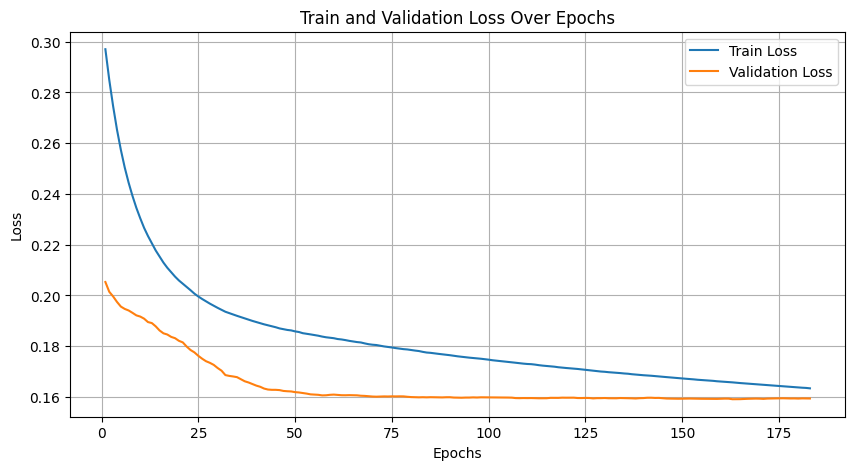

In [64]:
# 훈련과 검증 손실에 대한 그래프 그리기
results = model.evals_result()
train_error = results['validation_0']['mape']
val_error = results['validation_1']['mape']
epoch_range = range(1, len(train_error)+1)

plt.figure(figsize=(10,5))
plt.plot(epoch_range, train_error, label='Train Loss')
plt.plot(epoch_range, val_error, label='Validation Loss')
plt.title('Train and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# 평가
preds = model.predict(X_val)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y_val, preds)
mape = mean_absolute_percentage_error(y_val, preds)
print(mae, mape)

20.209998902254508 0.1590980634476729


# pp_test.csv 파일생성

In [ ]:
p_test_path = './p_test.csv'
df = pd.read_csv(p_test_path) # train or test

In [ ]:
dates = df['date'].unique().tolist()

# datetime info
df['date'] = pd.to_datetime(df['date']) # str -> datetime
df['doy'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# datetime > str
df['date'] = df['date'].dt.date.astype(str)

# hour -> daily
hour_data = []
for date in dates:
    # 2013-01-02
    data = df[df['date'] == date]['y'].tolist()
    hour_data.append(data)

hour_df = pd.DataFrame(data=hour_data,
                       columns=[f'{i}H' for i in range(15)]) # if train->24, test->15

# df --- hour_df
df = df.drop_duplicates('date', keep='first').reset_index(drop=True)
df = pd.concat([df, hour_df], axis='columns')

# pp_tset 파일 생성
df.to_csv('pp_test.csv', index=False)

# Submission 제출

In [ ]:
test = pd.read_csv('./pp_test.csv')

test_preds = model.predict(test[X_column])
# submission
submission = pd.read_csv("./data/sample_submission.csv")
submission["y"] = test_preds.reshape(-1)
submission.to_csv("./submission.csv", index=False)

# Check

['doy', 'year', 'month', 'day', 'weekday', '0H', '1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', '11H', '12H', '13H', '14H']


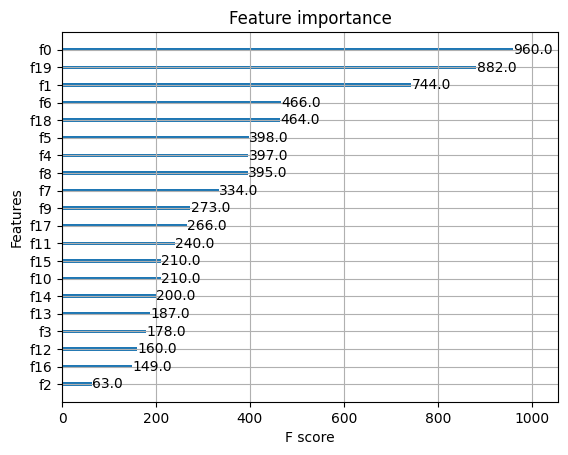

In [44]:
# importance
import xgboost

xgboost.plot_importance(model)
print(X_column)

In [ ]:
gen = pd.read_csv('./submission.csv')
pre = pd.read_csv('./r_submission.csv')

print(gen == pre)